Import packages:

In [1]:
import os
import scipy.io
import numpy
import re
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import deep_signature.dist
import deep_signature.data
from IPython.display import IFrame, display, HTML

Load curves:

In [2]:
dataset_generator = deep_signature.data.DatasetGenerator()
dataset_generator.load_raw_curves(dir_path='./raw-data-new')

rotation_factor = 10
sampling_factor = 10
sample_points = 500
curves = dataset_generator.generate_curves(rotation_factor=rotation_factor, sampling_factor=sampling_factor, sample_points=sample_points)

3135 raw curves loaded.
done 100.0%

Plot a sample of augmented curves:

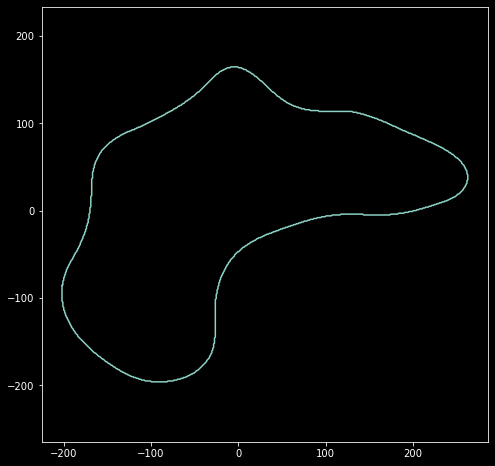

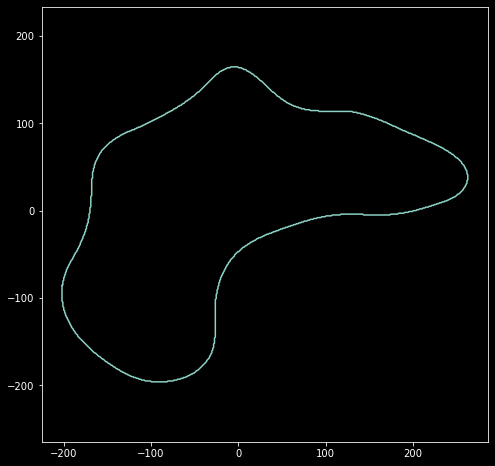

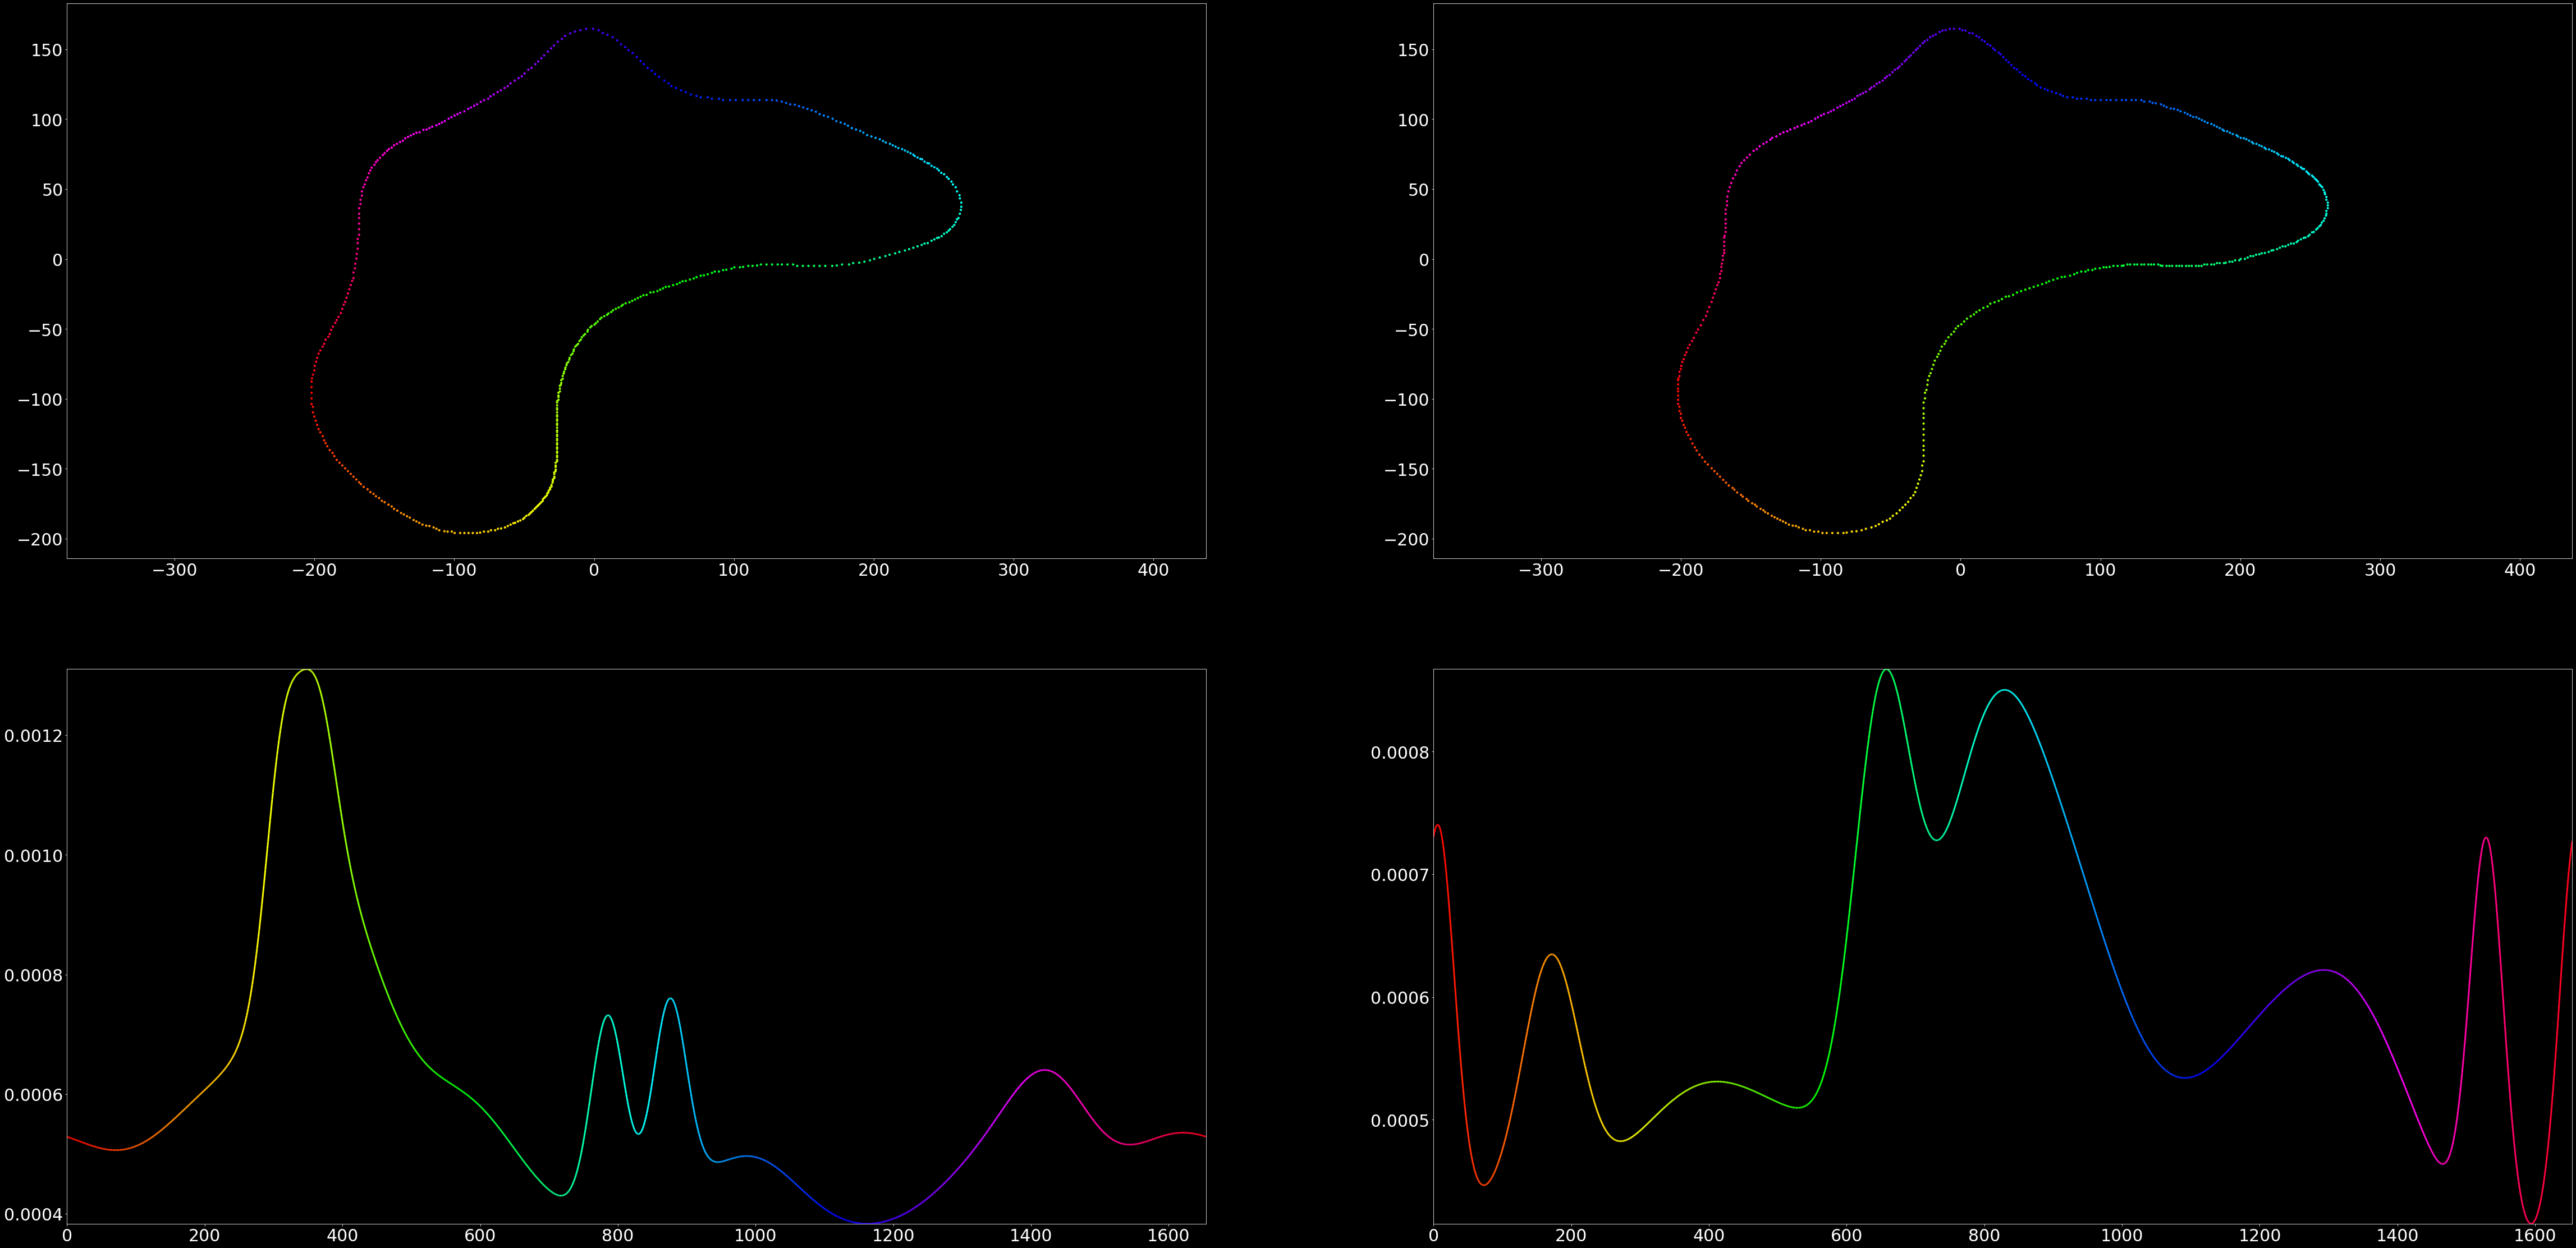

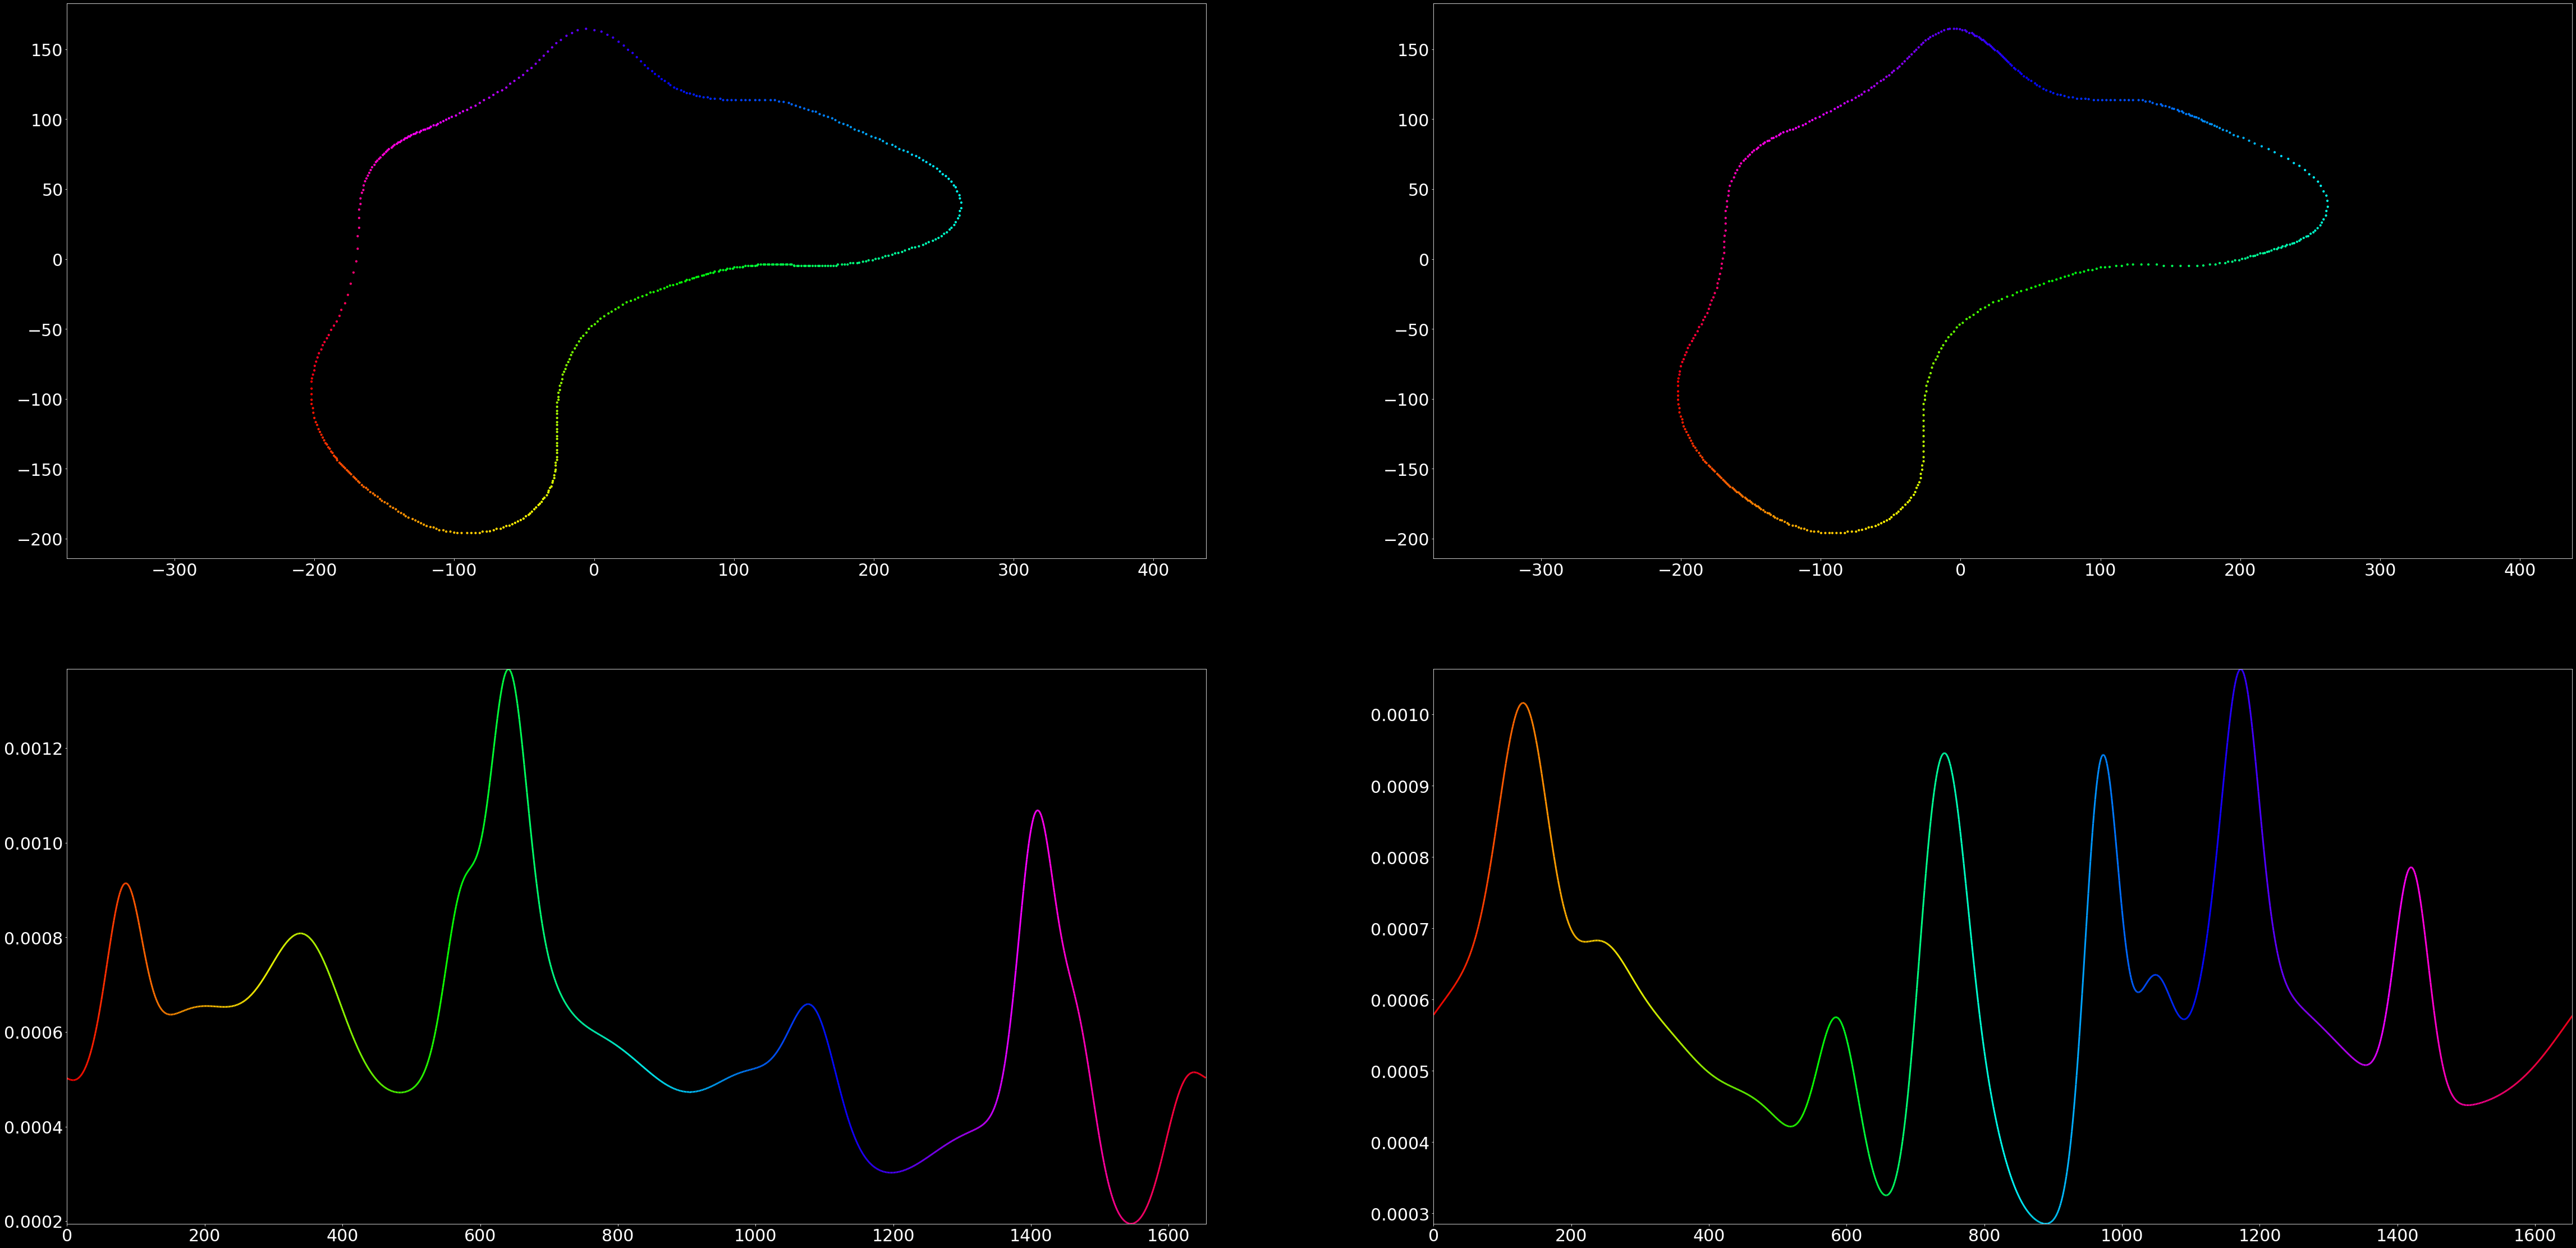

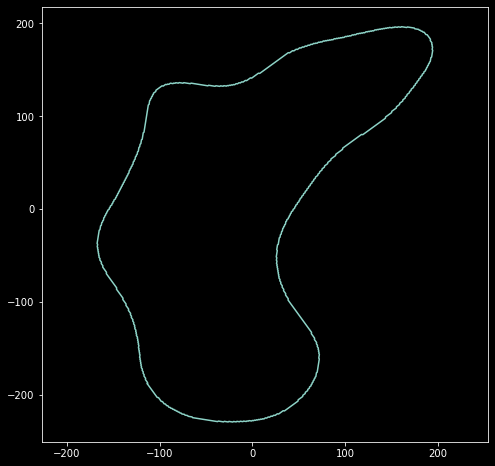

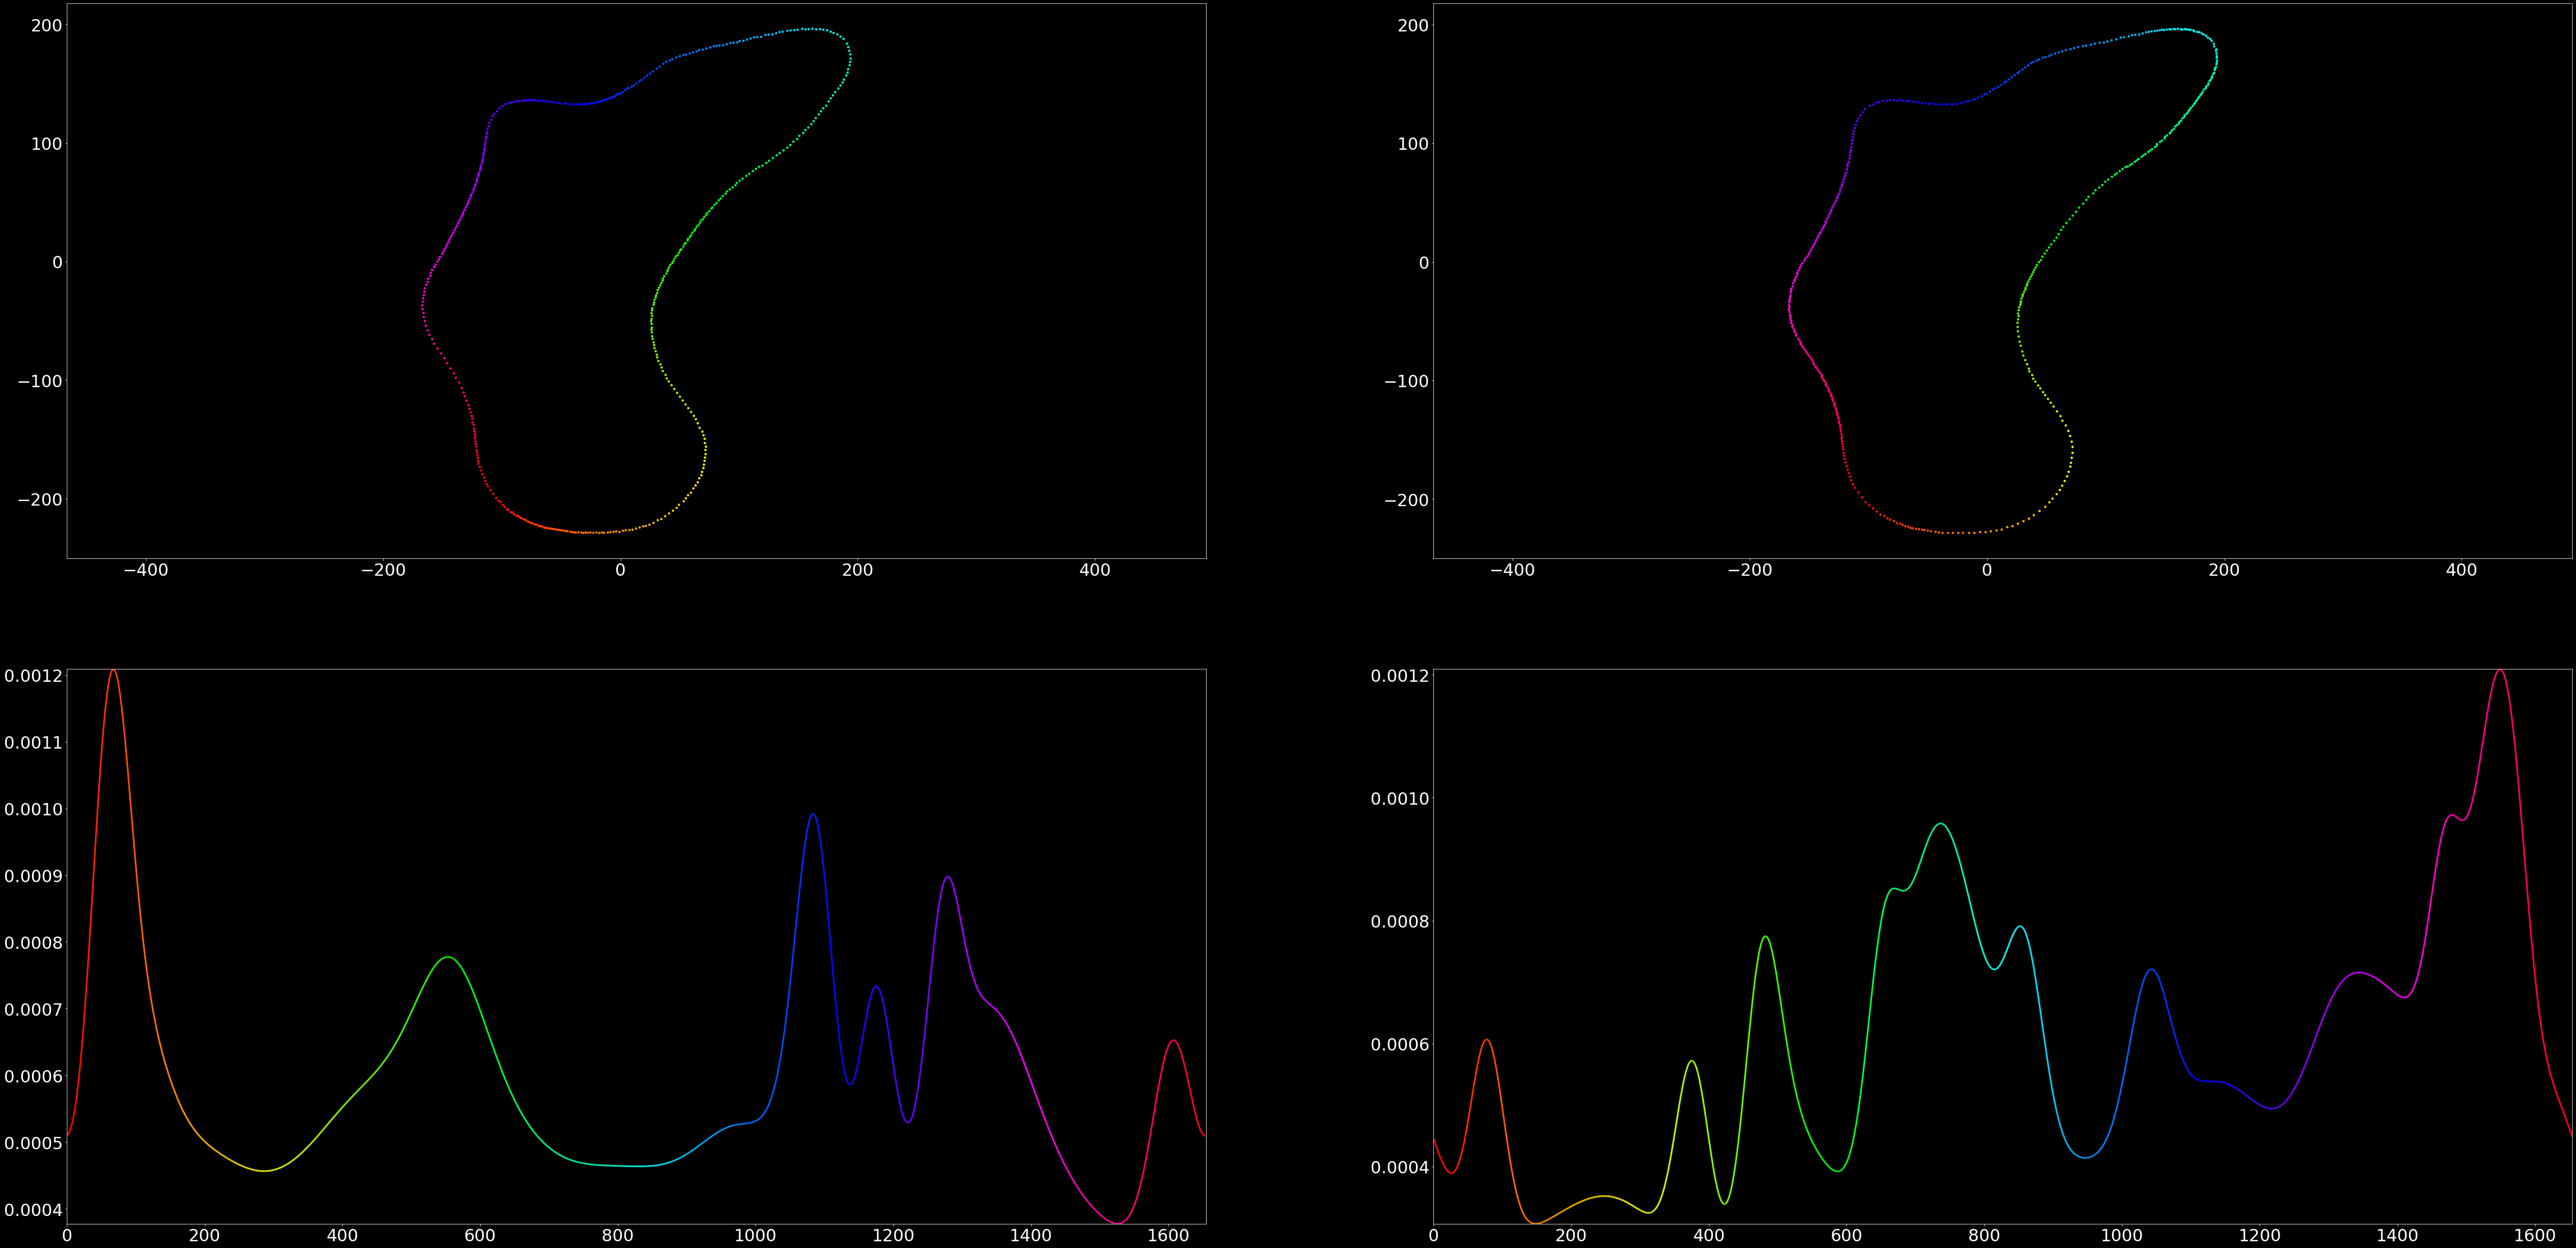

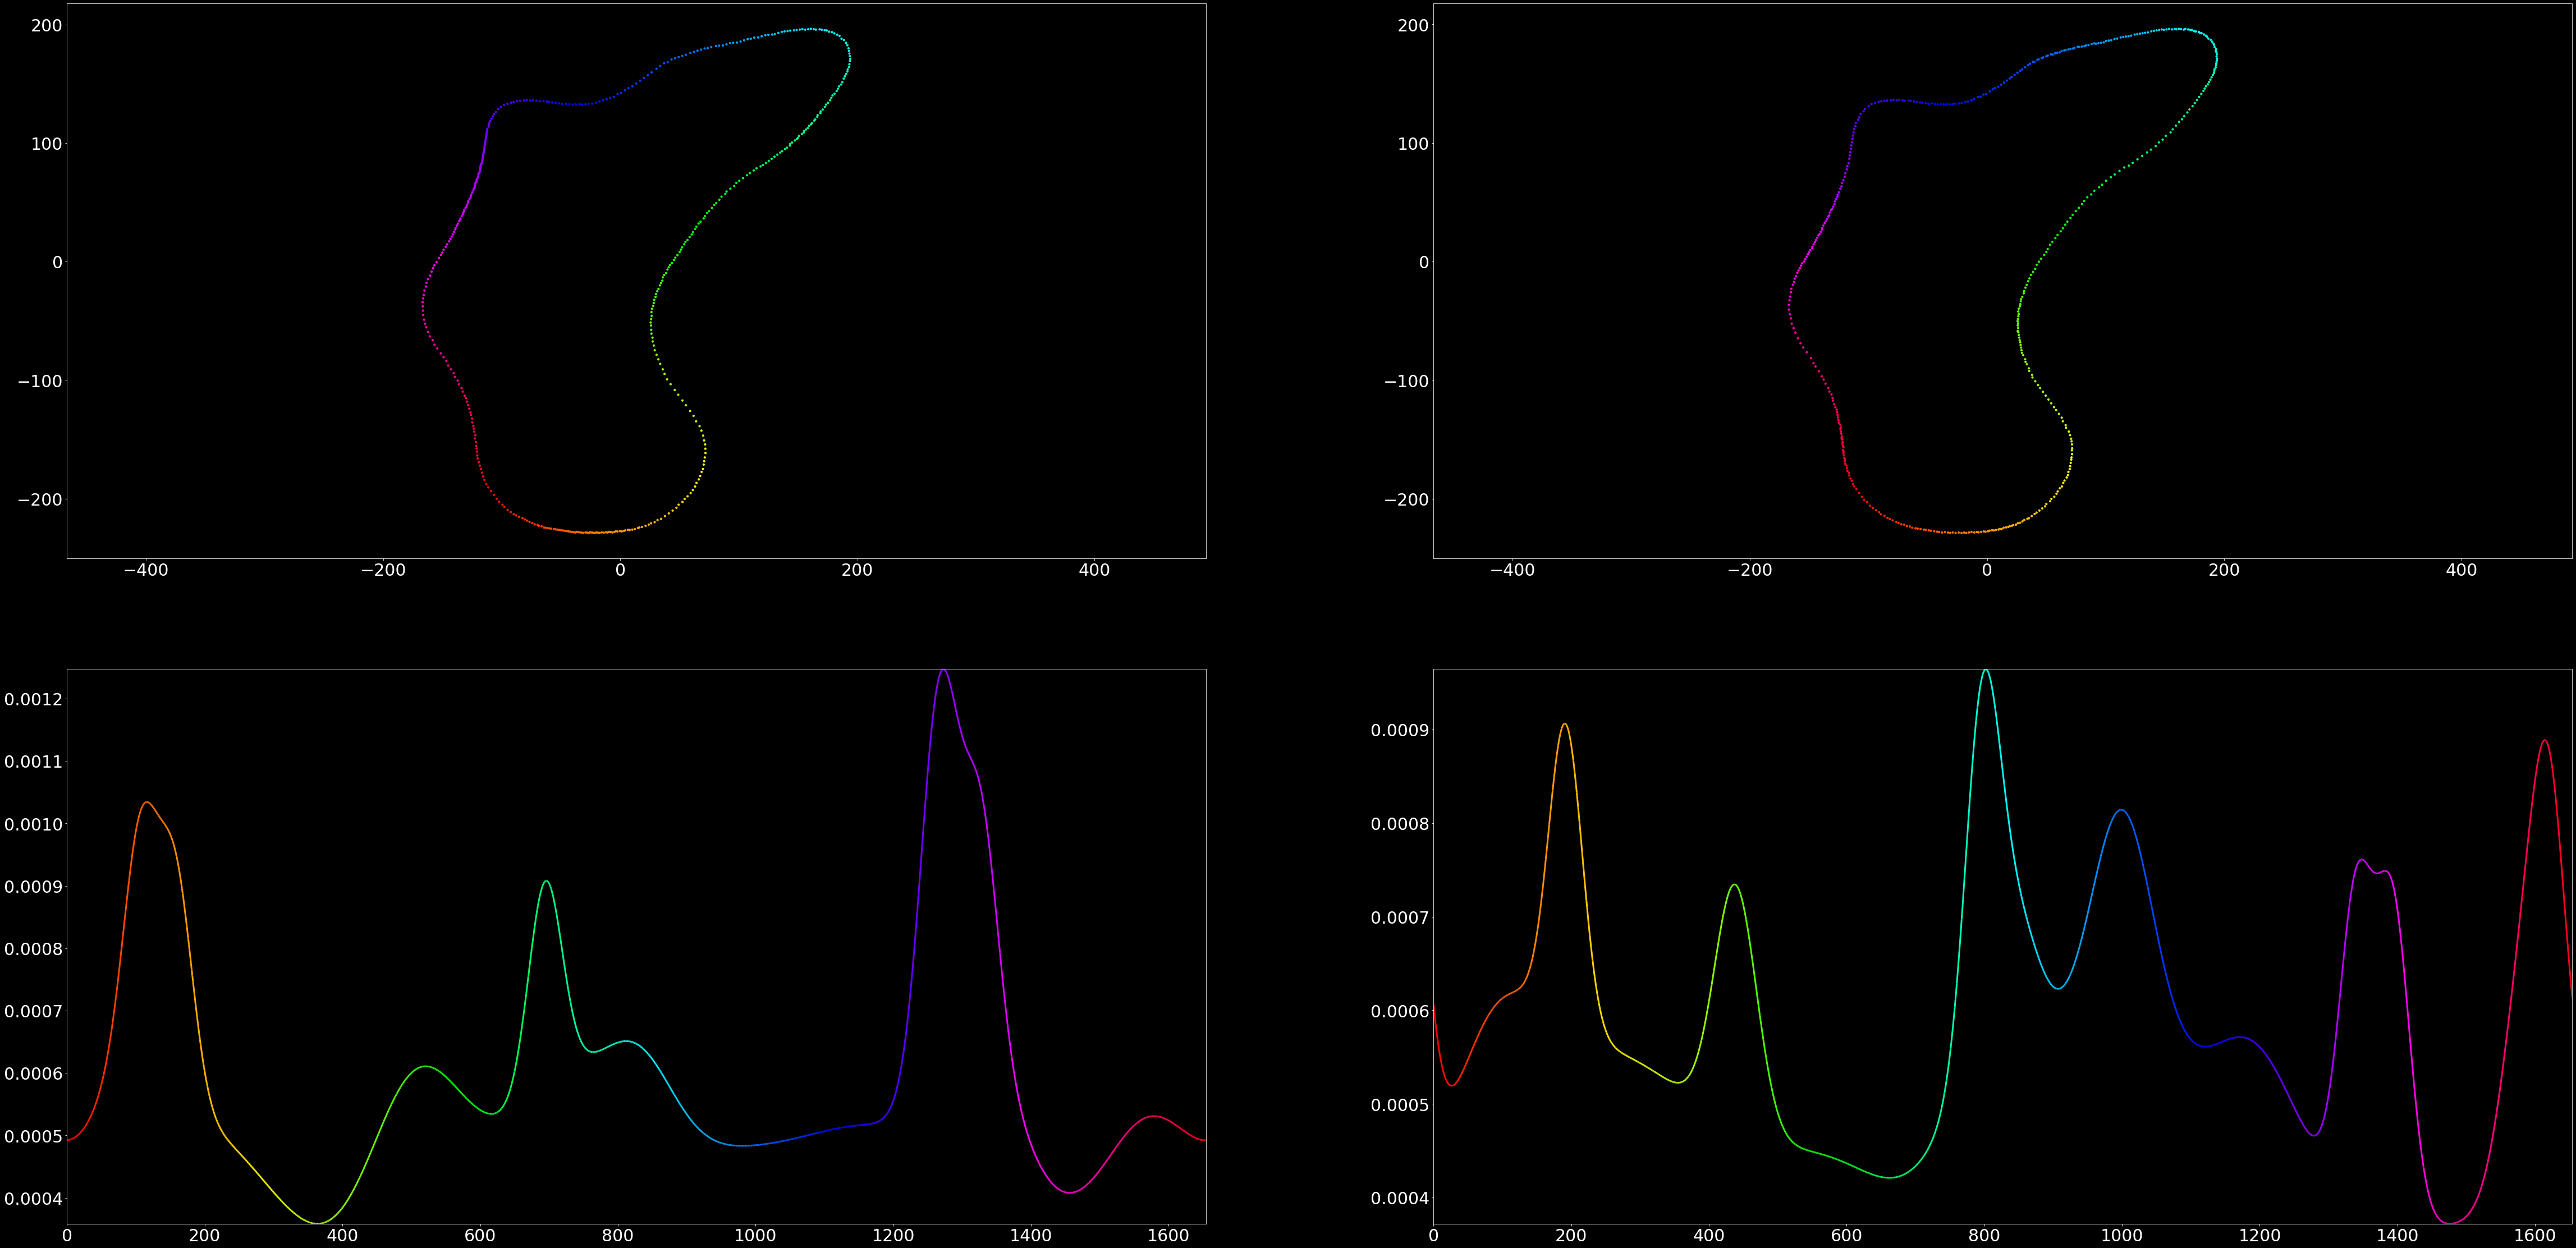

In [5]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

# https://stackoverflow.com/questions/36074455/python-matplotlib-with-a-line-color-gradient-and-colorbar
def colorline(ax, x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = numpy.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = numpy.array([z])

    z = numpy.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    # ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = numpy.array([x, y]).T.reshape(-1, 1, 2)
    segments = numpy.concatenate([points[:-1], points[1:]], axis=1)
    return segments

plt.style.use("dark_background")

for i, curve in enumerate(curves[:3]):
    display(HTML(f'<h1>Curve #{i}</h1>'))

    display(HTML(f'<h2>Raw Curve</h2>'))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('equal')
    ax.plot(curve.curve[:,0], curve.curve[:,1])
    plt.show()

    display(HTML(f'<h2>Curve Configurations</h2>'))

    for curve_configuration_index, curve_configuration in enumerate(curve.curve_configurations[:2]):

        display(HTML(f'<h3>Curve Configuration #{curve_configuration_index}</h3>'))

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.axis('equal')
        curve_conf_x = curve_configuration.curve[:,0]
        curve_conf_y = curve_configuration.curve[:,1]
        ax.plot(curve_conf_x, curve_conf_y)
        plt.show()

        curve_samples_per_row = 2
        curve_samples_chunks = list(chunker(curve_configuration.curve_samples, curve_samples_per_row))
        for curve_samples_chunk in curve_samples_chunks[:2]:  
            fig, ax = plt.subplots(2, curve_samples_per_row, figsize=(80,40))
            for i, curve_sample in enumerate(curve_samples_chunk):

                dist_bins = len(curve_sample.dist)

                ax[0, i].axis('equal')

                x = curve_sample.sampled_curve[:,0]
                y = curve_sample.sampled_curve[:,1]
                c = numpy.linspace(0.0, 1.0, dist_bins)


                # lc = colorline(ax[0, i], curve_conf_x, curve_conf_y, cmap='hsv')

                ax[0, i].scatter(
                    x=x,
                    y=y,
                    c=c[curve_sample.sorted_indices],
                    s=10,
                    cmap='hsv')

                
                x = numpy.array(range(dist_bins))
                y = curve_sample.dist
                lc = colorline(ax[1, i], x, y, cmap='hsv')

                ax[1, i].set_xlim(x.min(), x.max())
                ax[1, i].set_ylim(y.min(), y.max())

                # Set the tick labels font
                for label in (ax[1, i].get_xticklabels() + ax[1, i].get_yticklabels()):
                    label.set_fontsize(30)

                # Set the tick labels font
                for label in (ax[0, i].get_xticklabels() + ax[0, i].get_yticklabels()):
                    label.set_fontsize(30)

            plt.show()